In [2]:
import torch
import torch.nn as nn
import pandas as pd

device = "cuda" if torch.cuda.is_available else "cpu"
print(device)

cuda


In [3]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path =data_path / "pizza_steak_sushi"
if image_path.is_dir():
    print("directory already exists... continue")
else:
    print(f"{image_path} does not exist, creating one")
    image_path.mkdir(parents=True,exist_ok=True)
    #다운로드


data\pizza_steak_sushi does nt exist, creating one


In [4]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)

Did not find data\pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


In [5]:
import os
def walk_through_dir(dir_path):
    """walks through dir"""
    for dirpath,dirnames,filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}")
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi


In [9]:
train_dir = image_path / "train"
test_dir = image_path / "test"
test_dir 


WindowsPath('data/pizza_steak_sushi/test')

Random image path: data\pizza_steak_sushi\test\sushi\2394442.jpg
Image class: sushi
Image height: 408
Image width: 512


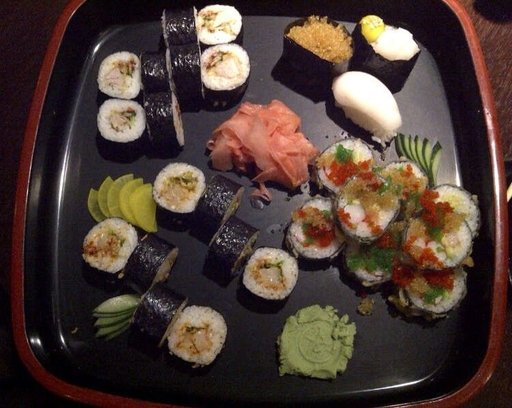

In [17]:
from PIL import Image
import random

random.seed(42)

image_path_list =list(image_path.glob("*/*/*.jpg"))
random_image_path = random.choice(image_path_list)
img_class = random_image_path.parent.stem
# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {img_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

In [20]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt 
import torch

data_transform = transforms.Compose(
    [
        transforms.Resize(size=(64,64)),
        #이미지 확률따라 뒤집기
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor()

    ]
)

train_dataset =datasets.ImageFolder(root="data/pizza_steak_sushi",transform=data_transform)

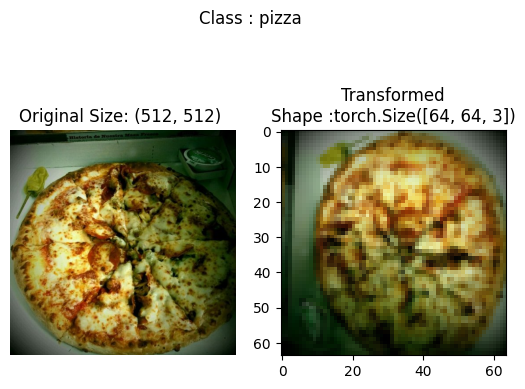

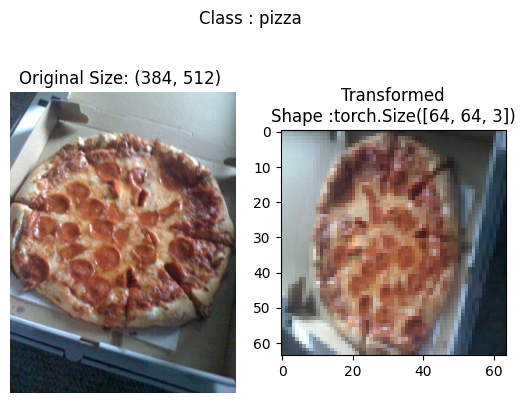

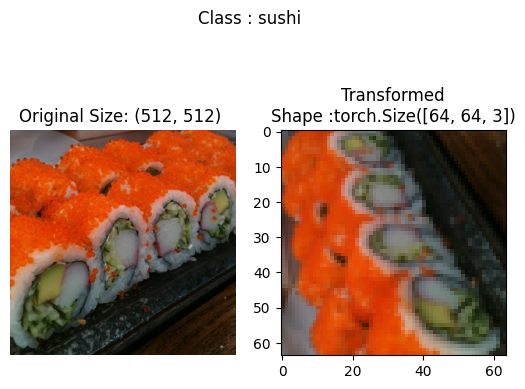

In [26]:
def plot_transformed_images(image_paths,transform,n=3,seed=43):
    """Select random images and loads/transforms them then plots original and transformed."""

    if seed : 
        random.seed(seed)
    random_image_paths= random.sample(image_paths,k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1,ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original Size: {f.size} ",)
            ax[0].axis('off')

            transformed_image = transform(f).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape :{transformed_image.shape}")
            fig.suptitle(f"Class : {image_path.parent.stem}")
plot_transformed_images(image_paths=image_path_list,transform=data_transform,n=3,seed=43)

In [28]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,transform=data_transform,target_transform=None)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform)

print(train_data)
print(test_data)

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data\pizza_steak_sushi\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data\pizza_steak_sushi\test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [29]:
# Get class names as a list
class_names = train_data.classes
# Can also get class names as a dict
class_dict = train_data.class_to_idx

In [30]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.01

torch.Size([3, 64, 64]) color_channels,height,width
torch.Size([64, 64, 3]) height,width,color_channels


Text(0.5, 1.0, 'pizza')

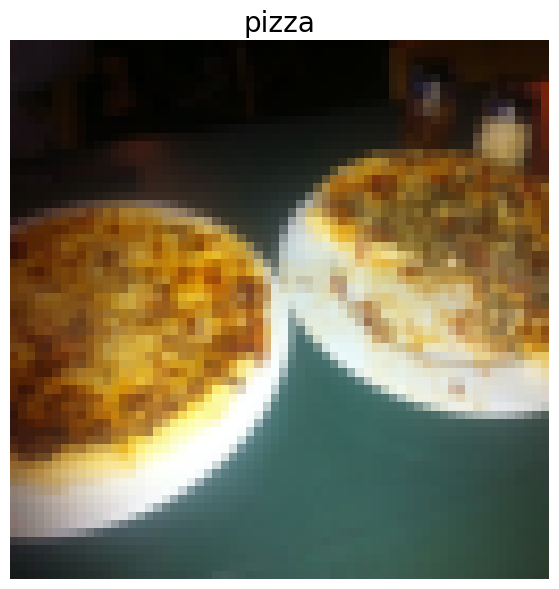

In [33]:
img_permute = img.permute(1,2,0)
print(img.shape,"color_channels,height,width")
print(img_permute.shape, "height,width,color_channels")

plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label],fontdict={"fontsize" :  "20"})

In [36]:

from typing import Tuple,Dict,List
# Make function to find classes in target directory
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """Finds the class folder names in a target directory.
    
    Assumes target directory is in standard image classification format.

    Args:
        directory (str): target directory to load classnames from.

    Returns:
        Tuple[List[str], Dict[str, int]]: (list_of_class_names, dict(class_name: idx...))
    
    Example:
        find_classes("food_images/train")
        >>> (["class_1", "class_2"], {"class_1": 0, ...})
    """
    # 1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    
    # 2. Raise an error if class names not found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")
        
    # 3. Create a dictionary of index labels (computers prefer numerical rather than string labels)
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

In [ ]:
from torch.utils.data import Dataset
import pathlib

class ImageFolderCustom(Dataset):
  # 2. Initialize with a targ_dir and transform (optional) parameter
    def __init__(self, targ_dir: str, transform=None) -> None:
        
        # 3. Create class attributes
        # Get all image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # note: you'd have to update this if you've got .png's or .jpeg's
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)
